In [75]:
from src.functions import *

In [76]:
plt.rcParams.update(
    {
        "xtick.direction": "in",
        "ytick.direction": "out",
        "ytick.right": False,
        "xtick.top": False,
        "ytick.left": True,
        "xtick.bottom": False,
        "figure.facecolor": "1",
        "savefig.facecolor": "1",
        "savefig.dpi": 600,
        "figure.dpi": 600,
        "savefig.bbox": "tight",
        "font.size": 7,
        "font.family": "serif",
        "lines.markersize": 4,
        "lines.linewidth": 1,
        'axes.axisbelow' : True
    }
)

In [83]:
methods = ['random', 'local', 'quantum', 'fixed_gamma', 'ra']

In [84]:
qubit_sweeps = {}
delta = {}
delta_avg = {}
delta_std = {}
fit = {}
k = {}
k_err = {}

for method in methods:
    qubit_sweeps[method] = load_from_json(f'data/qubit_sweep_{method}.json')

    delta[method] = qubit_sweeps[method]['delta']
    delta_avg[method] = qubit_sweeps[method]['delta_avg']
    delta_std[method] = qubit_sweeps[method]['delta_std']
    fit[method] = qubit_sweeps[method]['fit']
    k[method] = qubit_sweeps[method]['k']
    k_err[method] = qubit_sweeps[method]['k_err']

T = qubit_sweeps['random']['T']
qubits_range = qubit_sweeps['random']['qubits_range']
num_random_models = qubit_sweeps['random']['num_random_models']

colors = {'random': dark_grey,
          'local': blue,
          'quantum': red,
          'fixed_gamma': black,
          'ra': 'green'}

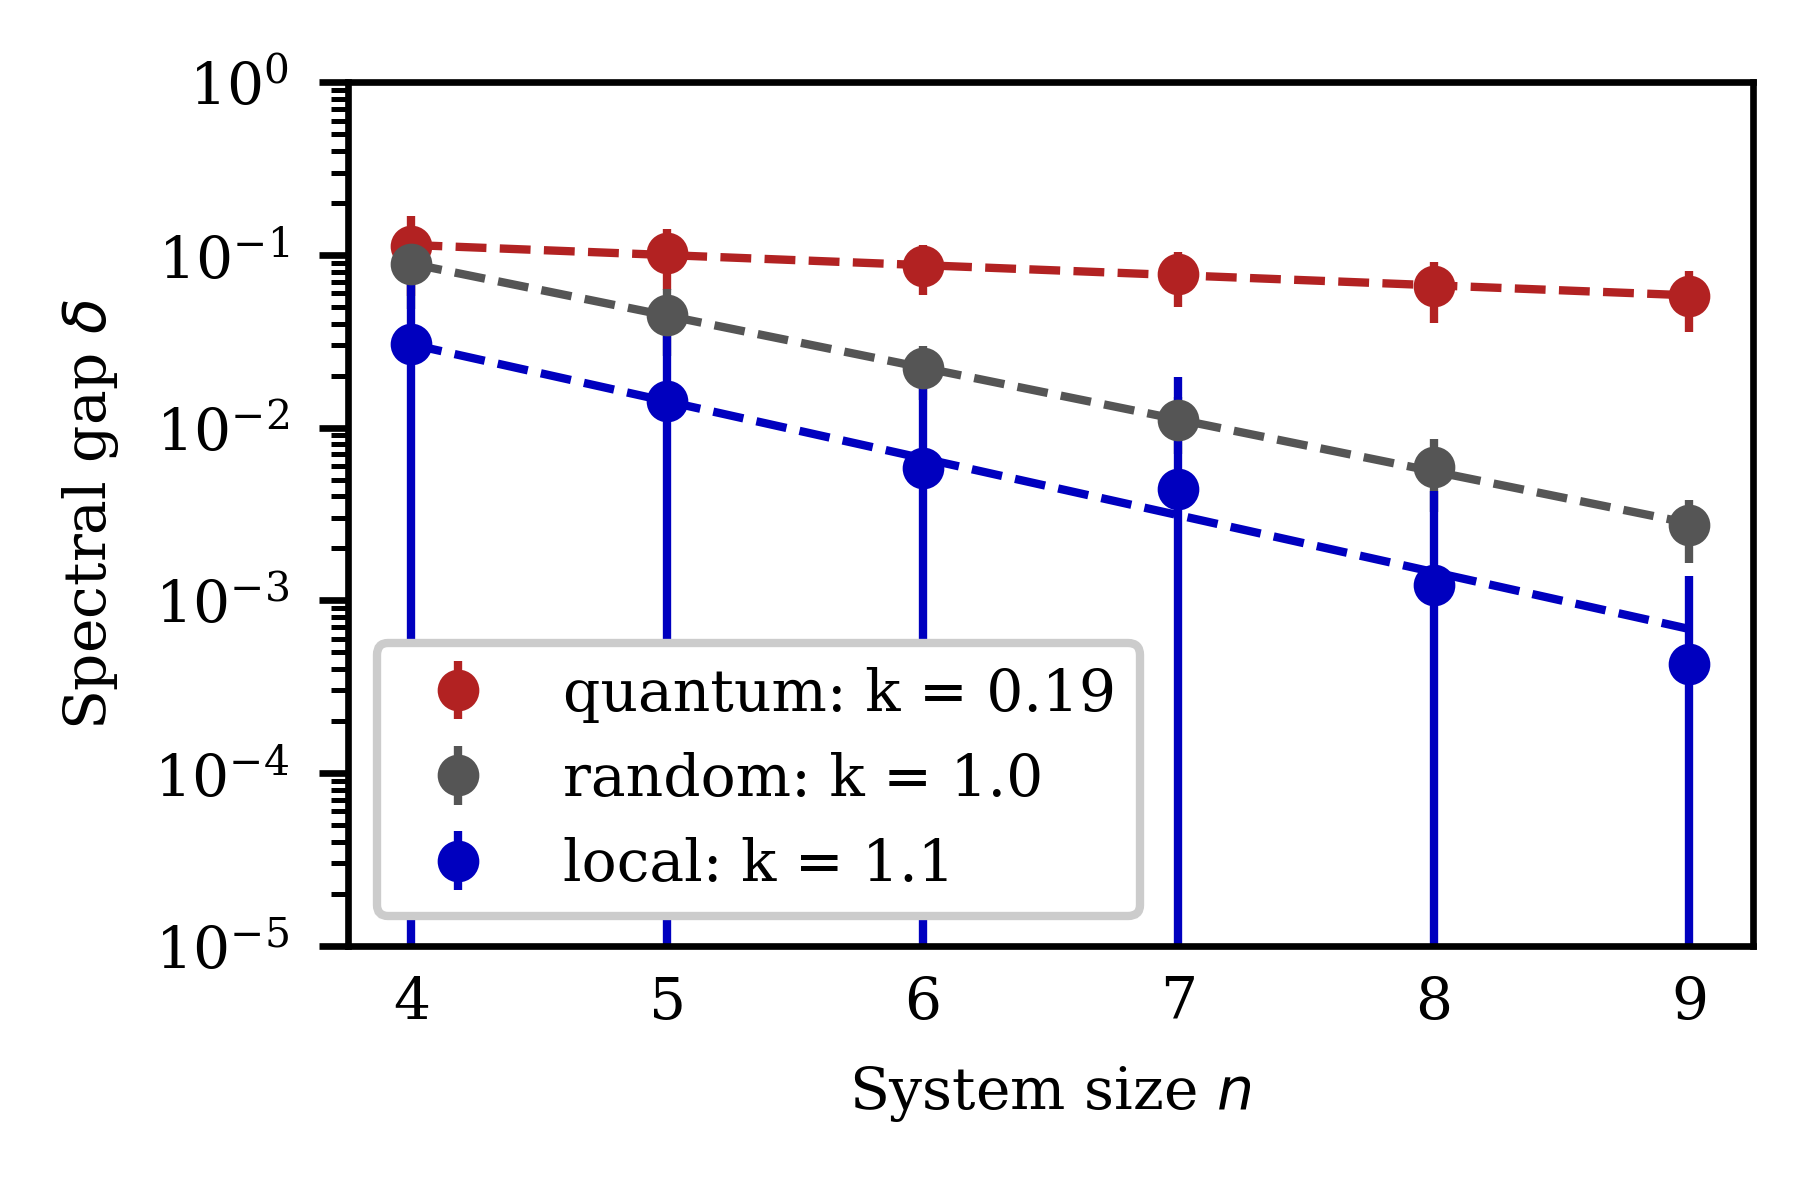

<Figure size 3840x2880 with 0 Axes>

In [85]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

for method in ['quantum', 'random', 'local']:
    # Plot the data with error bars
    plt.errorbar(qubits_range, 
                 delta_avg[method], 
                 yerr=delta_std[method], 
                 fmt='o', 
                 color=colors[method], 
                 label=method+f': k = {np.around(k[method],2)}')
    # Plot the fits
    plt.plot(qubits_range, fit[method], '--', color=colors[method])

plt.yscale('log')
plt.ylim([0.00001, 1])

# Customize the plot
plt.xlabel('System size $n$')
plt.ylabel('Spectral gap $\delta$')

legend = plt.legend()
legend.get_frame().set_alpha(1)

plt.show()
plt.tight_layout()
fig.savefig(local_path+f'figures/scale_factors_original')

In [86]:
for method in methods:
    print(f"k factor for {method}: {k[method]} ± {k_err[method]}")

k factor for random: 0.99888815009349 ± 0.004417185426827075
k factor for local: 1.0951029688447729 ± 0.05548696973204787
k factor for quantum: 0.1938440564179517 ± 0.006350590636703265
k factor for fixed_gamma: 0.20022225312400263 ± 0.01305029380575416
k factor for ra: 0.2723064549844583 ± 0.010218374134203737


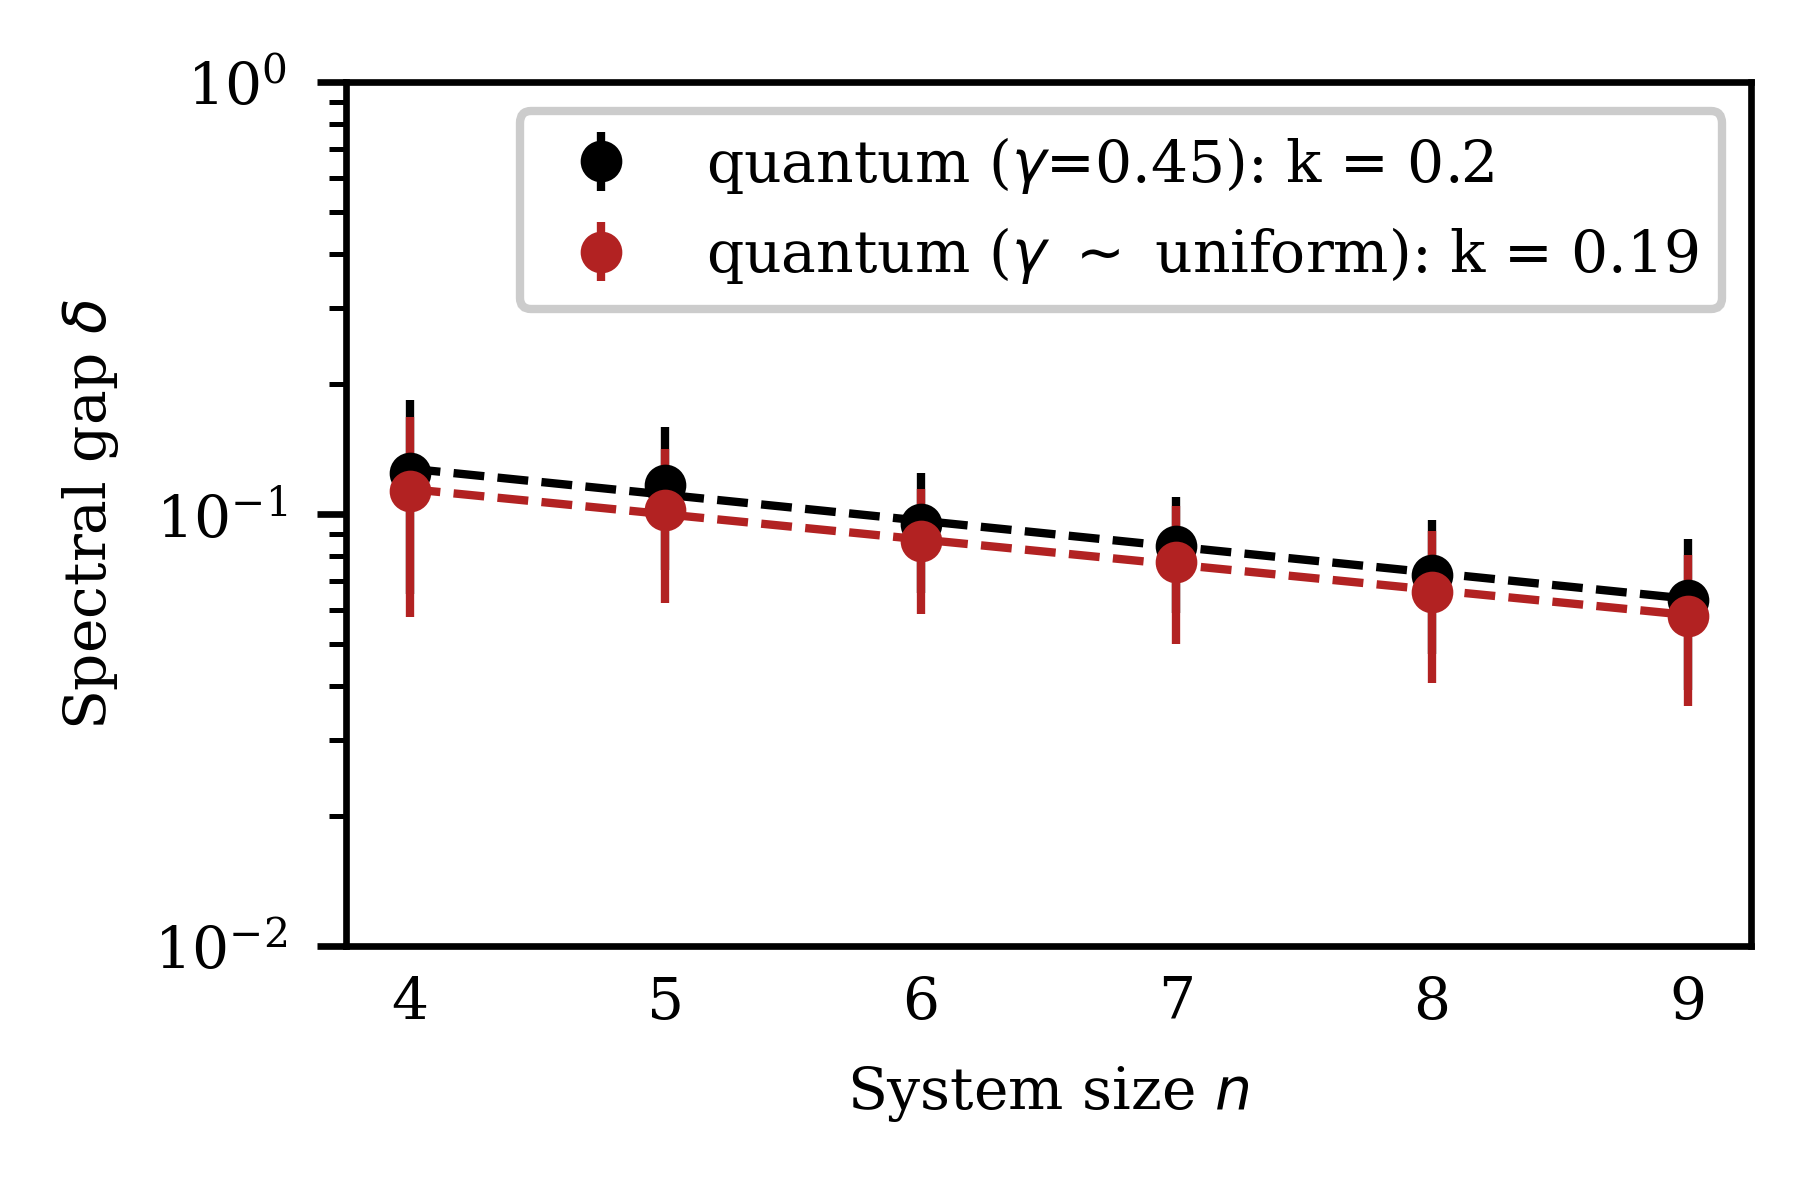

<Figure size 3840x2880 with 0 Axes>

In [87]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

plt.errorbar(qubits_range, 
                delta_avg['fixed_gamma'], 
                yerr=delta_std['fixed_gamma'], 
                fmt='o', 
                color=colors['fixed_gamma'], 
                label='quantum ($\gamma$=0.45)'+f': k = {np.around(k["fixed_gamma"],2)}')
# Plot the fits
plt.plot(qubits_range, fit['fixed_gamma'], '--', color=colors["fixed_gamma"])


# Plot the data with error bars
plt.errorbar(qubits_range, 
                delta_avg['quantum'], 
                yerr=delta_std['quantum'], 
                fmt='o', 
                color=colors['quantum'], 
                label='quantum ($\gamma$ $\sim$ uniform)'+f': k = {np.around(k["quantum"],2)}')
# Plot the fits
plt.plot(qubits_range, fit['quantum'], '--', color=colors['quantum'])


plt.yscale('log')
plt.ylim([0.01, 1])

# Customize the plot
plt.xlabel('System size $n$')
plt.ylabel('Spectral gap $\delta$')

legend = plt.legend()
legend.get_frame().set_alpha(1)

plt.show()
plt.tight_layout()
fig.savefig(local_path+f'figures/scale_factors_fixed_gamma')

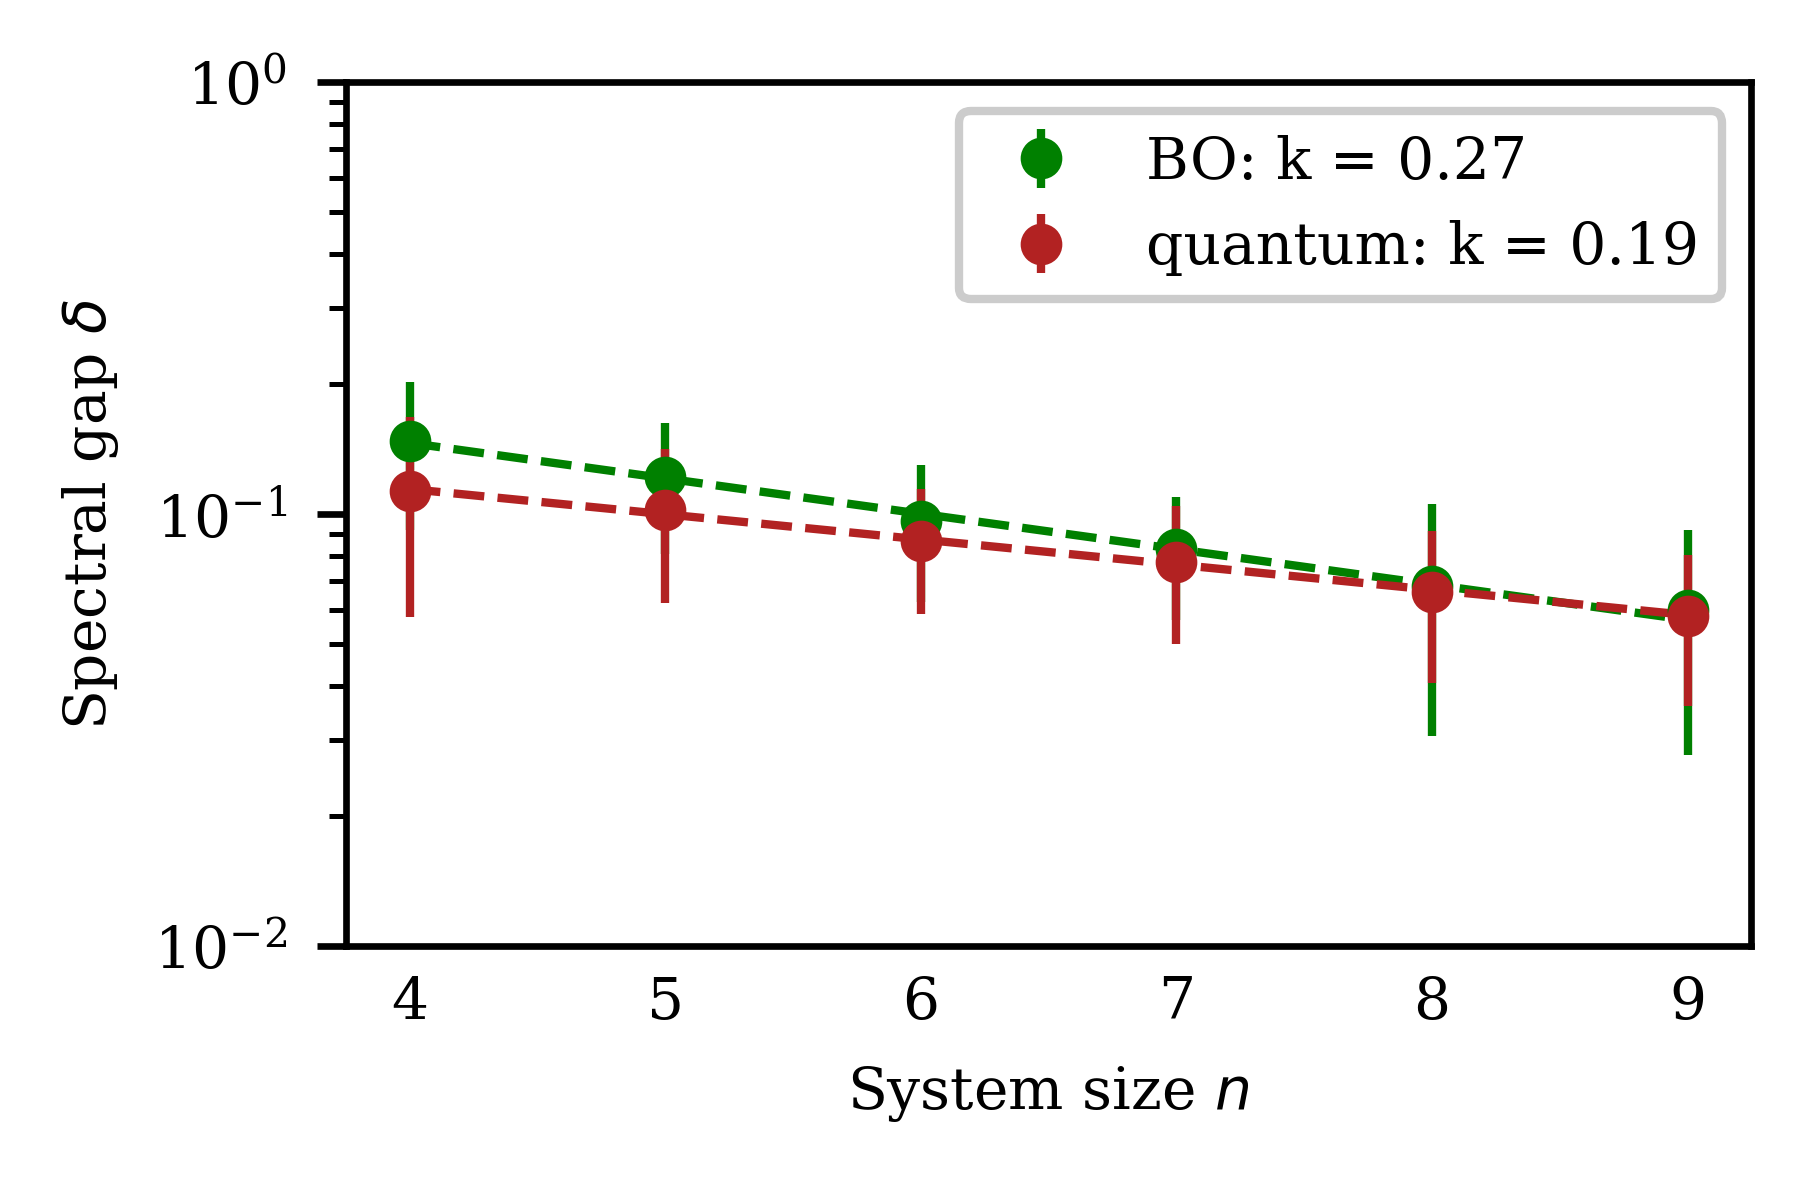

<Figure size 3840x2880 with 0 Axes>

In [89]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

plt.errorbar(qubits_range, 
                delta_avg['ra'], 
                yerr=delta_std['ra'], 
                fmt='o', 
                color=colors['ra'], 
                label='BO'+f': k = {np.around(k["ra"],2)}')
# Plot the fits
plt.plot(qubits_range, fit['ra'], '--', color=colors['ra'])


# Plot the data with error bars
plt.errorbar(qubits_range, 
                delta_avg['quantum'], 
                yerr=delta_std['quantum'], 
                fmt='o', 
                color=colors['quantum'], 
                label='quantum'+f': k = {np.around(k["quantum"],2)}')
# Plot the fits
plt.plot(qubits_range, fit['quantum'], '--', color=colors['quantum'])


plt.yscale('log')
plt.ylim([0.01, 1])

# Customize the plot
plt.xlabel('System size $n$')
plt.ylabel('Spectral gap $\delta$')

legend = plt.legend()
legend.get_frame().set_alpha(1)

plt.show()
plt.tight_layout()
fig.savefig(local_path+f'figures/scale_factors_ra')